In [3]:
!pip install tf_keras
get_ipython().run_line_magic('env', 'TF_USE_LEGACY_KERAS=1')

env: TF_USE_LEGACY_KERAS=1


In [10]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load a pre-trained image classification model from TensorFlow Hub
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False)


In [11]:
# Load an example image (variation: using a different dataset or custom image)
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

In [12]:
# Example image (variation: use an alternative image)
image_path = tf.keras.utils.get_file("grace_hopper.jpg", "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
image, processed_image = load_and_preprocess_image(image_path)

61306/61306 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


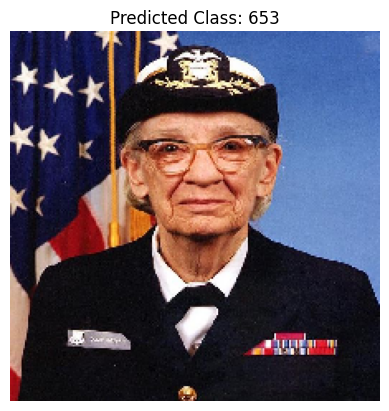

In [13]:
# Predict
predictions = model(processed_image)
predicted_class = np.argmax(predictions[0], axis=-1)

# Display results
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis("off")
plt.show()
